In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('churn.csv')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [3]:
print(df.shape)
print(df.columns)

(10000, 14)
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe().T

count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

### Cleaning Data
-Remove Duplicated data

-Drop nulls

-Populate/input missing values

-Filter out outliers

-Normalize data typos/differences

-Converting data types properly

In [6]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape[0]

0

In [7]:
#check missing values
df.isna().sum(axis=0)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
#Dropping all the columns which are not required 
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [9]:
#Columns with numerical data and categorical data
numerical_data = df.select_dtypes(include='number')
categorical_data = df.select_dtypes(exclude='number')

print(numerical_data.columns)
print(categorical_data.columns)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
Index(['Geography', 'Gender'], dtype='object')


In [10]:
print(df['Exited'].value_counts())
print(df['Gender'].value_counts())
print(df['Geography'].value_counts())
print(df['IsActiveMember'].value_counts())

0    7963
1    2037
Name: Exited, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
1    5151
0    4849
Name: IsActiveMember, dtype: int64


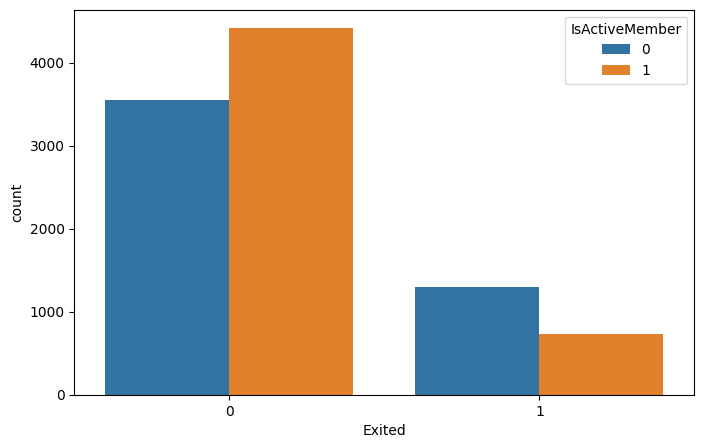

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Exited', hue='IsActiveMember', data=df)
plt.show()

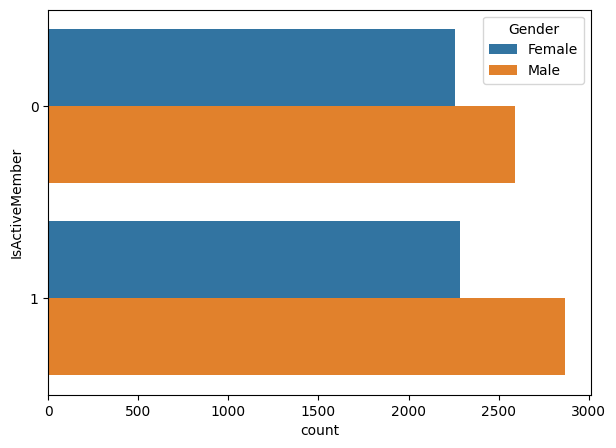

In [12]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, y='IsActiveMember', hue='Gender')
plt.show()

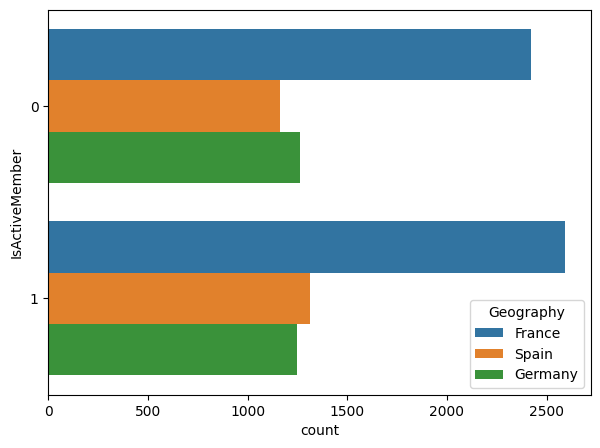

In [13]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, y='IsActiveMember', hue='Geography')
plt.show()

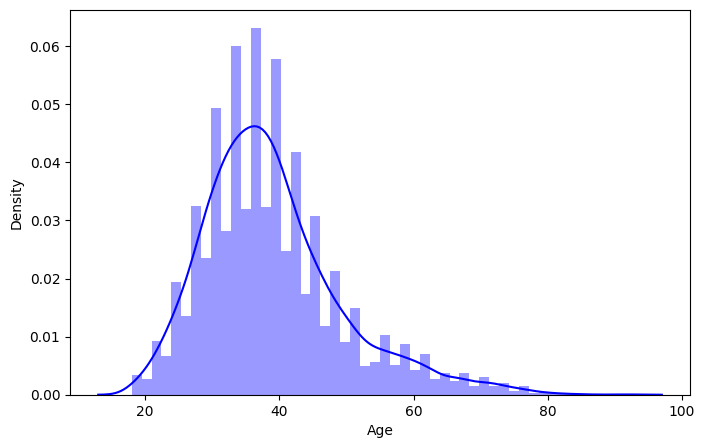

In [14]:
plt.figure(figsize=(8, 5))
sns.distplot(df['Age'], kde=True, color='blue')
plt.show()

In [15]:
print("Minimum Age is {}".format(df['Age'].min()))
print("Maximum Age is {}".format(df['Age'].max()))
print("Mean: {:.2f}".format(df['Age'].mean()))
print("Median: {:.2f}".format(df['Age'].median()))

Minimum Age is 18
Maximum Age is 92
Mean: 38.92
Median: 37.00


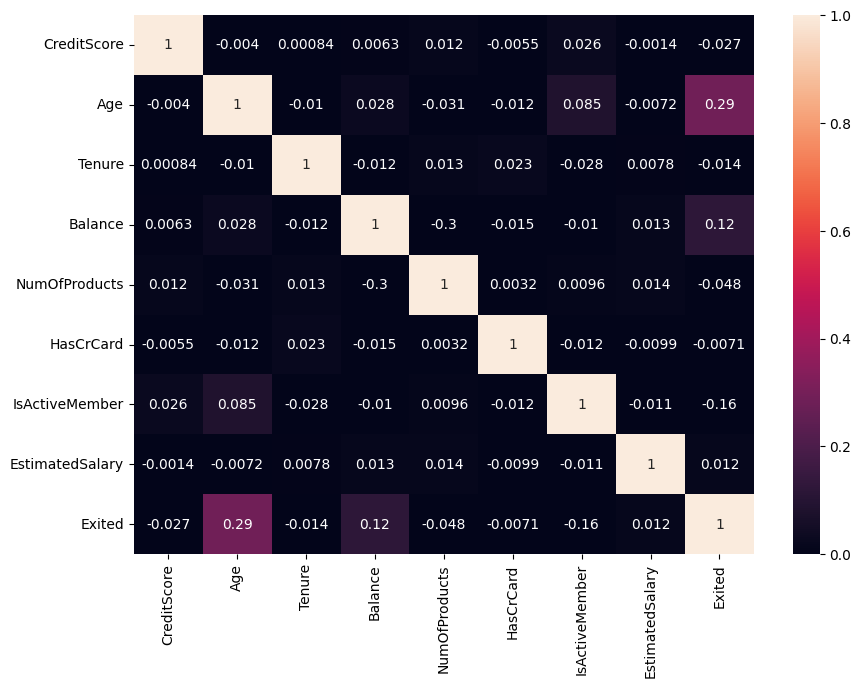

In [16]:
#Checking correlation
plt.figure(figsize=(10,7)),
sns.heatmap(df.corr(),vmin=0, vmax=1,annot=True);

In [17]:
df['Age Group'] = pd.cut(x=df['Age'], 
                            bins=[18, 40, 60, 95], 
                            labels=['Youngster', 'Middle-Aged', 'Senior Citizen'])
df['Exited'].groupby(df['Age Group']).sum()

Age Group
Youngster          684
Middle-Aged       1236
Senior Citizen     115
Name: Exited, dtype: int64

One-hot encoding the categorical features

In [18]:
feat_set2 = ['Geography', 'Gender']
df_encoded = pd.get_dummies(df[feat_set2], drop_first=True)
df_encoded.sample(5)

Geography_Germany  Geography_Spain  Gender_Male
228                   1                0            1
9938                  0                1            0
7072                  0                0            1
1025                  0                0            0
9175                  0                0            0

In [19]:
df1 = df.join(df_encoded)
df1.sample(5)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
1413          503   Germany    Male   30      10  136622.55              2   
7118          715    France    Male   32       8  175307.32              1   
2541          611    France  Female   61       3  131583.59              4   
9599          749   Germany  Female   32       7   79523.13              1   
3180          678    France  Female   60      10  117738.81              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited       Age Group  \
1413          0               0         47310.24       0       Youngster   
7118          1               0        187051.23       0       Youngster   
2541          0               1         66238.23       1  Senior Citizen   
9599          0               1        157648.12       0       Youngster   
3180          1               0        147489.76       1     Middle-Aged   

      Geography_Germany  Geography_Spain  Gender_Male  
1413                  1                0            1  
7118                  0                0            1  
2541                  0                0            0  
9599                  1                0            0  
3180                  0                0            0

In [20]:
df2 = df1.drop(['Geography', 'Gender', 'Age Group'], axis=1)
df2.sample(5)

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
4343          549   54       5   92877.33              1          1   
2265          623   35       5       0.00              2          1   
2291          598   27       8   90721.52              2          1   
1423          657   30       1  139762.13              2          1   
7017          646   25       5  182876.88              2          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
4343               0          2619.64       1                  1   
2265               0        101192.08       0                  0   
2291               0        109296.18       0                  0   
1423               1         23317.88       0                  1   
7017               1         42537.59       1                  0   

      Geography_Spain  Gender_Male  
4343                0            1  
2265                0            0  
2291                1            1  
1423                0            1  
7017                1            1

In [21]:
df2.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [23]:
df2.shape

(10000, 12)

In [24]:
#Splitting the data into features
X=df2.copy().drop(columns=['Exited']).values
y=df2['Exited'].values

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.preprocessing import Imputer


steps=[('scaler', StandardScaler()),
      ('knn', KNeighborsClassifier())]
pipeline= Pipeline(steps)
parameters= {'knn__n_neighbors':np.arange(1,50)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42)
cv= GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
y_pred= cv.predict(X_test)
print(cv.best_params_)
print(cv.score(X_test, y_test))
print(classification_report(y_test, y_pred))

{'knn__n_neighbors': 15}
0.842
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1607
           1       0.71      0.33      0.45       393

    accuracy                           0.84      2000
   macro avg       0.78      0.65      0.68      2000
weighted avg       0.83      0.84      0.82      2000



### Model Selection

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

pipeline_lr = Pipeline([('lr', LogisticRegression())])
pipeline_svc = Pipeline([('svc', SVC())])
pipeline_knn = Pipeline([('knn', KNeighborsClassifier())])
pipeline_nb = Pipeline([('nb', GaussianNB())])

pipelines = [pipeline_lr, pipeline_svc, pipeline_knn, pipeline_nb]

pipe_dict = {0: 'Logistic Regression', 
             1: 'Support Vector Classifier', 
             2: 'K-Neighbors Classifier', 
             3: 'Naive Bayes Classifier'}

for pipe in pipelines:
    pipe.fit(X_train, y_train)
    


for i, model in enumerate(pipelines):
    y_pred = model.predict(X_test)
    print(f'Accuracy Score:')
    score = accuracy_score(y_test, y_pred)
    print("{}: {:.4f}".format(pipe_dict[i], score))
    print(f'ROC AUC Score:')
    score = roc_auc_score(y_test, y_pred)
    print("{}: {:.4f}".format(pipe_dict[i], score))
    print(f'F1 Score:')
    score = f1_score(y_test, y_pred)
    print("{}: {:.4f}\n".format(pipe_dict[i], score))

Accuracy Score:
Logistic Regression: 0.8005
ROC AUC Score:
Logistic Regression: 0.5250
F1 Score:
Logistic Regression: 0.1231

Accuracy Score:
Support Vector Classifier: 0.8035
ROC AUC Score:
Support Vector Classifier: 0.5000
F1 Score:
Support Vector Classifier: 0.0000

Accuracy Score:
K-Neighbors Classifier: 0.7640
ROC AUC Score:
K-Neighbors Classifier: 0.5110
F1 Score:
K-Neighbors Classifier: 0.1355

Accuracy Score:
Naive Bayes Classifier: 0.7910
ROC AUC Score:
Naive Bayes Classifier: 0.5182
F1 Score:
Naive Bayes Classifier: 0.1144



In [26]:
### Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
## Prediction
y1_pred=classifier.predict(X_test)

In [28]:
score=accuracy_score(y_test,y1_pred)
score

0.87

In [29]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [30]:
import numpy as np

In [31]:
classifier.predict([[700, 29, 5, 150000, 3, 0, 1, 90000, 0, 0, 1]])

array([1], dtype=int64)

In [32]:
classifier.predict_proba([[700, 29, 5, 150000, 3, 0, 1, 90000, 0, 0, 1]])

array([[0.18, 0.82]])